Team Members: Lakshmi Anil, Aparna S, Anpu Mathews, Susanna M Thomas

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#storing the dataset to a dataframe named 'data'
data=pd.read_csv('train_E1GspfA.csv')

In [3]:
#displaying the first few rows
data.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [4]:
data.shape

(18247, 3)

There are 18,247 observations and 3 features in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


There are no missing values in any of the columns.

In [6]:
#descriptive statistics
data.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [7]:
data.describe(include=object)

,date
count,18247
unique,895
top,2021-02-28
freq,24


In [8]:
#displaying the last few rows
data.tail()

,date,hour,demand
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104
18246,2021-02-28,23,85


The data available is from August 2018 to February 2021.

# Feature Engineering

In [9]:
#converting date variable to datetime object
data['date'] = pd.to_datetime(data['date'])


In [10]:
#extracting datetime features from the date variable
data['year'] = data['date'].apply(lambda x:x.year)
data['month'] = data['date'].apply(lambda x:x.month)
data['isQuarterDate'] = data['date'].apply(lambda x:x.quarter)
data['day'] = data['date'].apply(lambda x:x.day)
data['dayOfWeek'] = data['date'].apply(lambda x:x.dayofweek)
data['isWeekend'] = data['dayOfWeek'].apply(lambda x:1 if x>4 else 0)

#dropping the date feature since all the information is extracted
data.drop(['date'], axis=1, inplace = True)

#checking the dataset 
data.head()

,hour,demand,year,month,isQuarterDate,day,dayOfWeek,isWeekend
0,9,91,2018,8,3,18,5,1
1,10,21,2018,8,3,18,5,1
2,13,23,2018,8,3,18,5,1
3,14,104,2018,8,3,18,5,1
4,15,81,2018,8,3,18,5,1


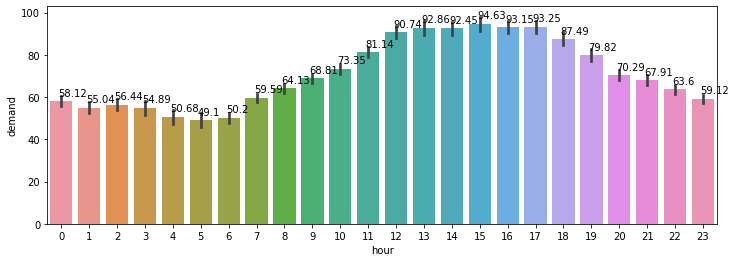

In [11]:
#Hour vs Demand

plt.figure(figsize=(12,4))
fig=sns.barplot(x=data['hour'], y=data['demand'])

#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height(),2) , (p.get_x()+0.3, p.get_height()+2.5))
plt.show()

In [12]:
#defining a function to find the timing of the day
def timeOfDay(n):
    if n in range(7,12):
        return 'Forenoon'
    elif n in range(12,18):
        return 'Afternoon'
    elif n in range(18,123): 
        return 'Evening'
    elif n in range(0,7) or n == 23:
        return 'Night'
    
data['timeOfDay'] = data['hour'].apply(lambda x: timeOfDay(x))
data.head()

,hour,demand,year,month,isQuarterDate,day,dayOfWeek,isWeekend,timeOfDay
0,9,91,2018,8,3,18,5,1,Forenoon
1,10,21,2018,8,3,18,5,1,Forenoon
2,13,23,2018,8,3,18,5,1,Afternoon
3,14,104,2018,8,3,18,5,1,Afternoon
4,15,81,2018,8,3,18,5,1,Afternoon


In [13]:
#defining a function to find the season
def monthToSeasons(x):
    if x in[3,4,5]:
        return 'Summer'
    elif x in [6,7,8]:
        return 'Monsoon'
    elif x in [9,10,11]:
        return 'Autumn'
    elif x in [12,1,2]:
        return 'Winter'
    
data['Season'] = data['month'].apply(monthToSeasons)
data.head()

,hour,demand,year,month,isQuarterDate,day,dayOfWeek,isWeekend,timeOfDay,Season
0,9,91,2018,8,3,18,5,1,Forenoon,Monsoon
1,10,21,2018,8,3,18,5,1,Forenoon,Monsoon
2,13,23,2018,8,3,18,5,1,Afternoon,Monsoon
3,14,104,2018,8,3,18,5,1,Afternoon,Monsoon
4,15,81,2018,8,3,18,5,1,Afternoon,Monsoon


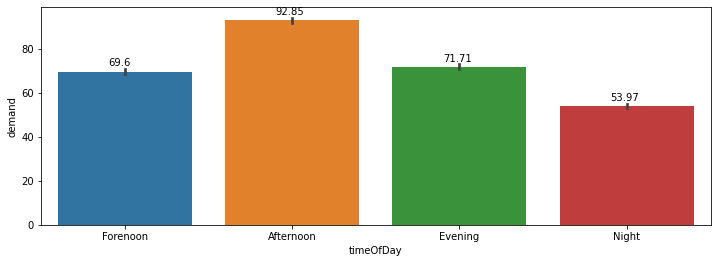

In [14]:
#Time of Day vs Demand

plt.figure(figsize=(12,4))
fig=sns.barplot(x=data['timeOfDay'], y=data['demand'])

#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height(),2) , (p.get_x()+0.3, p.get_height()+2.5))
plt.show()

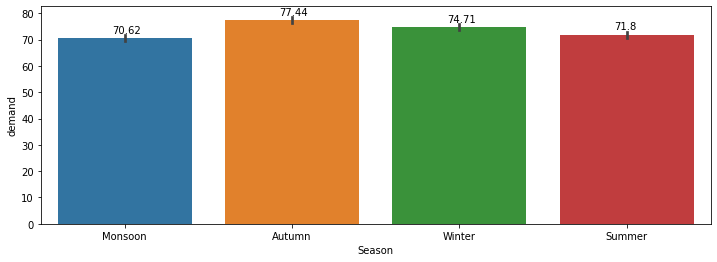

In [15]:
#Season vs Demand

plt.figure(figsize=(12,4))
fig=sns.barplot(x=data['Season'], y=data['demand'])

#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height(),2) , (p.get_x()+0.325, p.get_height()+2))
plt.show()

In [16]:
# replacing the categorical features with numerical values
data['timeOfDay'].replace({'Forenoon': 1, 'Afternoon':3, 'Evening':2, 'Night':0}, 
                          inplace=True)


data['Season'].replace({'Summer':1,'Monsoon':0,'Autumn':3,'Winter':2},inplace=True)
data.head()

,hour,demand,year,month,isQuarterDate,day,dayOfWeek,isWeekend,timeOfDay,Season
0,9,91,2018,8,3,18,5,1,1,0
1,10,21,2018,8,3,18,5,1,1,0
2,13,23,2018,8,3,18,5,1,3,0
3,14,104,2018,8,3,18,5,1,3,0
4,15,81,2018,8,3,18,5,1,3,0


# Handling of cyclical data

The following features are cyclical in nature.<br>'hour','isQuarterDate','dayOfWeek'  and 'month'.<br>Sine and cosine transformations are done on the cyclical data.

last_week['Sin_Hour'] = np.sin(2 * np.pi * last_week['Hour'] / max(last_week['Hour'])) <br>last_week['Cos_Hour'] = np.cos(2 * np.pi * last_week['Hour'] / max(last_week['Hour']))

In [17]:
#defining fucntionsfor sine and cosine transformations
def sin_transform(x,max_value):
    return np.sin(2*np.pi*x/max_value)

def cos_transform(x,max_value):
    return np.cos(2*np.pi*x/max_value)

In [18]:
#applying the transformations over the cyclical data
data['sin_hour'] = data['hour'].apply(lambda x: sin_transform(x,24))
data['cos_hour'] = data['hour'].apply(lambda x: cos_transform(x,24))
data['sin_month'] = data['month'].apply(lambda x: sin_transform(x,12))
data['cos_month'] = data['month'].apply(lambda x: cos_transform(x,12))
data['sin_isQuarterDate'] = data['isQuarterDate'].apply(lambda x: sin_transform(x,4))
data['cos_isQuarterDate'] = data['isQuarterDate'].apply(lambda x: cos_transform(x,4))
data['sin_dayOfWeek'] = data['dayOfWeek'].apply(lambda x: sin_transform(x,7))
data['cos_dayOfWeek'] = data['dayOfWeek'].apply(lambda x: cos_transform(x,7))

data.drop(['hour','month','isQuarterDate','dayOfWeek'],inplace=True,axis=1)

In [19]:
data.head()

,demand,year,day,isWeekend,timeOfDay,Season,sin_hour,cos_hour,sin_month,cos_month,sin_isQuarterDate,cos_isQuarterDate,sin_dayOfWeek,cos_dayOfWeek
0,91,2018,18,1,1,0,0.707107,-0.707107,-0.866025,-0.5,-1.0,-1.836970e-16,-0.974928,-0.222521
1,21,2018,18,1,1,0,0.500000,-0.866025,-0.866025,-0.5,-1.0,-1.836970e-16,-0.974928,-0.222521
2,23,2018,18,1,3,0,-0.258819,-0.965926,-0.866025,-0.5,-1.0,-1.836970e-16,-0.974928,-0.222521
3,104,2018,18,1,3,0,-0.500000,-0.866025,-0.866025,-0.5,-1.0,-1.836970e-16,-0.974928,-0.222521
4,81,2018,18,1,3,0,-0.707107,-0.707107,-0.866025,-0.5,-1.0,-1.836970e-16,-0.974928,-0.222521


In [20]:
#splitting the data
y=data['demand']
x=data.drop('demand',axis=1)

# Variable Inflation Factor

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_info['Columns'] = x.columns
vif_info.sort_values('VIF', ascending = False)

,VIF,Columns
0,21.281766,year
3,17.340030,timeOfDay
4,10.687623,Season
8,9.503311,cos_month
7,7.271152,sin_month
9,6.389700,sin_isQuarterDate
10,6.303212,cos_isQuarterDate
5,4.391178,sin_hour
1,4.247218,day
2,4.031921,isWeekend


In [22]:
#dropping columns with high VIF
x.drop(['year','timeOfDay','Season','cos_month','sin_month'],axis=1,inplace=True)

# Modelling

In [23]:
#splitting the dataset for training the model and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## Linear Regression Model

In [24]:
#Linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error
MSE_lin_reg=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the linear regression model is ',round(MSE_lin_reg,3))

Mean of squared errors of the linear regression model is  1399.869


## Polynomial Regression Model

In [26]:
#polynomial regression model with degree 2
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)

#converting feature matrix into polynomial feature matrix
x_poly= poly_regs.fit_transform(x_train)  
poly =linear_model.LinearRegression()  
model=poly.fit(x_train, y_train) 
predictions=model.predict(x_test)

In [27]:
MSE_poly_reg2=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the Polynomial regression model is ',round(MSE_poly_reg2,3))

Mean of squared errors of the Polynomial regression model is  1399.869


In [28]:
#polynomial regression model with degree 5
poly_regs= PolynomialFeatures(degree= 5)  
x_poly= poly_regs.fit_transform(x_train)  
poly =linear_model.LinearRegression()  
model=poly.fit(x_train, y_train) 
predictions=model.predict(x_test)

In [29]:
MSE_poly_reg5=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the linear Polynomial model is ',round(MSE_poly_reg5,3))

Mean of squared errors of the linear Polynomial model is  1399.869


## Ridge Regression Model 

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.016,normalize=True)
model=ridge_reg.fit(x_train, y_train)
predictions = model.predict(x_test)

In [31]:
MSE_ridg_reg=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the Ridge regression model is ',round(MSE_ridg_reg,3))

Mean of squared errors of the Ridge regression model is  1399.531


## LASSO Regression Model 

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso()
model=lasso.fit(x_train, y_train)
predictions = model.predict(x_test)

In [33]:
MSE_lasso=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the LASSO regression model is ',round(MSE_lasso,3))

Mean of squared errors of the LASSO regression model is  1412.687


## Decision Tree 

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt_model=dt.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)

In [35]:
MSE_Deci=mean_squared_error(dt_pred,y_test)
print('Mean of squared errors of the Decision Tree model is ',round(MSE_Deci,3))

Mean of squared errors of the Decision Tree model is  2391.043


## Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_model=rf.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [37]:
MSE_rf=mean_squared_error(rf_pred,y_test)
print('Mean of squared errors of the Random Forest model is ',round(MSE_rf,3))

Mean of squared errors of the Random Forest model is  1513.274


## Gradient Boosting 

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb_model=gb.fit(x_train,y_train)
gb_pred=gb_model.predict(x_test)

In [39]:
MSE_gb=mean_squared_error(gb_pred,y_test)
print('Mean of squared errors of the Gradient Boosting model is ',round(MSE_gb,3))

Mean of squared errors of the Gradient Boosting model is  1273.334


## XGBoost

In [40]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb_model=xgb.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)

In [41]:
MSE_xgb=mean_squared_error(xgb_pred,y_test)
print('Mean of squared errors of the XGBoost model is ',round(MSE_xgb,3))

Mean of squared errors of the XGBoost model is  1265.012


## AdaBoost

In [42]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
adb_model=adb.fit(x_train,y_train)
adb_pred=adb_model.predict(x_test)

In [43]:
MSE_adb=mean_squared_error(adb_pred,y_test)
print('Mean of squared errors of the AdaBoost model is ',round(MSE_adb,3))

Mean of squared errors of the AdaBoost model is  1439.537


## Summary 

In [44]:
print('MSE values for different models:\n')
print('Linear Regression Model : ',round(MSE_lin_reg,3))
print('Polynomial Regression Model(Degree = 2) : ',round(MSE_poly_reg2,3))
print('Polynomial Regression Model(Degree = 5) : ',round(MSE_poly_reg5,3))
print('Ridge Regression Model : ',round(MSE_ridg_reg,3))
print('Lasso Regression Model : ',round(MSE_lasso,3))
print('Decision Tree : ',round(MSE_Deci,3))
print('Random Forest : ',round(MSE_rf,3))
print('Gradient Boosting : ',round(MSE_gb,3))
print('XGBoost : ',round(MSE_xgb,3))
print('AdaBoost : ',round(MSE_adb,3))

MSE values for different models:

Linear Regression Model :  1399.869
Polynomial Regression Model(Degree = 2) :  1399.869
Polynomial Regression Model(Degree = 5) :  1399.869
Ridge Regression Model :  1399.531
Lasso Regression Model :  1412.687
Decision Tree :  2391.043
Random Forest :  1513.274
Gradient Boosting :  1273.334
XGBoost :  1265.012
AdaBoost :  1439.537


#  Hyperparameter Tuning

Hyperparameter tuning is done on XGBoost Model.

In [45]:
xgb.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)>

## GridSearch 

In [46]:
#learning rate
eta=[0.3,0.35,0.4]
#minimum loss reduction required to make a split
gamma=[0,10,20]
#maximum depth of a tree
max_depth=[3,5,7,9]
#minimum sum of weights of all observations required in a child
min_child_weight=[0,0.5,0.9]

In [47]:
# Create the param grid
param_grid = {
    'eta':eta,
    'gamma':gamma,
    'max_depth':max_depth,
    'min_child_weight':min_child_weight
}

In [48]:
from sklearn.model_selection import GridSearchCV
xgb_Grid = GridSearchCV(estimator = xgb, param_grid = param_grid, verbose=2,n_jobs=4,cv=3)

In [49]:
xgb_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=4,
             param_grid={'eta': [0.3, 0.35, 0.4], 'gamma': [0, 10, 20],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [0, 0.5, 0.9]},
             verbose=2)

In [50]:
xgb_Grid.best_params_                                 

{'eta': 0.3, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 0}

In [51]:
xgb=XGBRegressor(learning_rate=0.30,gamma=0,max_depth=3,min_child_weight=0)
xgb_model=xgb.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)
MSE_xgb=mean_squared_error(xgb_pred,y_test)
print('Mean of squared errors of the XGBoost model is ',round(MSE_xgb,3))

Mean of squared errors of the XGBoost model is  1256.522
